In [121]:
import pandas as pd
import numpy as np
from joblib import Parallel, delayed
import matplotlib.pyplot as plt
import seaborn as sns

In [122]:
df = pd.read_excel("/home/anushka.agrawal/hla_peptide_selection/braun_et_al_2025_supp1.xlsx")

In [123]:
# rename columns to concatenate cell line / replicate info
df.rename(columns={
    'VMM1': 'VMM1/Nil 1',
    'Unnamed: 6': 'VMM1/Nil 2',
    'Unnamed: 7': 'VMM1/Nil 3',
    'Unnamed: 8': 'VMM1/IFN 1',
    'Unnamed: 9': 'VMM1/IFN 2',
    'Unnamed: 10': 'VMM1/IFN 3',
    
    1106: '1106/Nil 1',
    'Unnamed: 12': '1106/Nil 2',
    'Unnamed: 13': '1106/Nil 3',
    'Unnamed: 14': '1106/IFN 1',
    'Unnamed: 15': '1106/IFN 2',
    'Unnamed: 16': '1106/IFN 3',
    
    'A431_sC6': 'A431_sC6/Rep 1',
    'Unnamed: 18': 'A431_sC6/Rep 2',
    'Unnamed: 19': 'A431_sC6/Rep 3',
}, inplace=True)

df.dropna(subset=['Peptide'], inplace=True)

In [124]:
pd.set_option('display.max_columns', None)

# drop empty column
df.drop(['Unnamed: 23'], axis=1, inplace=True)

# drop peptides w post-translational modifications
df.drop(df[df['Modification'] != 'Not found'].index, inplace=True)

# drop peptides that aren't high confidence from C0602 source based clustering 
df.drop(df[df['C0602 Source Based\non Gibbs Clustering'] != 'high confidence'].index, inplace=True)

In [125]:
# add column indicating how many samples a peptide was detected in
df['detection_count'] = 0

# subset columns w mass spec data
sample_cols = ['VMM1/Nil 1', 'VMM1/Nil 2', 'VMM1/Nil 3', 'VMM1/IFN 1', 'VMM1/IFN 2', 'VMM1/IFN 3', '1106/Nil 1', '1106/Nil 2', '1106/Nil 3', '1106/IFN 1', '1106/IFN 2', '1106/IFN 3', 'A431_sC6/Rep 1', 'A431_sC6/Rep 2', 'A431_sC6/Rep 3']

def set_detection_count(row):
    count = 0
    for col in sample_cols:
        if row[col] != '-' and row[col] != 0:
            count += 1
    return count

# set detection count to number of samples peptide was detected in
df['detection_count'] = df.apply(set_detection_count, axis=1)
df.sort_values(by='detection_count', ascending=False, inplace=True)

In [126]:
for i in range(0, 16):
    print(f"threshold count {i}: {df[df['detection_count']>=i].shape[0]}")

threshold count 0: 14980
threshold count 1: 13786
threshold count 2: 7129
threshold count 3: 4596
threshold count 4: 3106
threshold count 5: 2187
threshold count 6: 1481
threshold count 7: 1046
threshold count 8: 764
threshold count 9: 536
threshold count 10: 359
threshold count 11: 214
threshold count 12: 124
threshold count 13: 69
threshold count 14: 35
threshold count 15: 6


In [127]:
df.head(10)

,Peptide,Peptide (with PTM),Length,Accession,Modification,VMM1/Nil 1,VMM1/Nil 2,VMM1/Nil 3,VMM1/IFN 1,VMM1/IFN 2,VMM1/IFN 3,1106/Nil 1,1106/Nil 2,1106/Nil 3,1106/IFN 1,1106/IFN 2,1106/IFN 3,A431_sC6/Rep 1,A431_sC6/Rep 2,A431_sC6/Rep 3,NetMHCpan.4 \nScore,"C0602 Binding Prediction\n(SB = strong binder, WB = weak binder)",C0602 Source Based\non Gibbs Clustering,detection_count
29320,LRNEKEQEL,LRNEKEQEL,9.0,P11388-3|TOP2A_HUMAN;P11388-2|TOP2A_HUMAN;P113...,Not found,128000000,409000000,171000000,213000000,1250000000,795000000,145000,61300,314000,3630000,16700,5660000,281000000,386000000,226000000,0.0596,SB,high confidence,15
20030,SSGPERSI,SSGPERSI,8.0,Q68D10-2|SPT2_HUMAN;Q68D10|SPT2_HUMAN;,Not found,4590000,31200000,79700000,43400000,52100000,104000000,653000,695000,1290000,3910000,1390000,8840000,449000000,729000000,395000000,26.5839,None,high confidence,15
11745,TRQDHAQQL,TRQDHAQQL,9.0,F5H6Y5|F5H6Y5_HUMAN;Q14980-2|NUMA1_HUMAN;Q1498...,Not found,97100000,330000000,249000000,17700000,1390000000,609000000,61200,128000,686000,1760000,295000,8810000,189000000,813000000,52500000,0.0158,SB,high confidence,15
14238,SSGPQRLV,SSGPQRLV,8.0,J3KRW7|J3KRW7_HUMAN;Q8N511|TM199_HUMAN;J3KS81|...,Not found,27100000,75500000,221000000,80600000,324000000,58000000,934000,528000,1530000,7910000,1560000,8570000,759000000,1110000000,861000000,24.1400,None,high confidence,15
13963,SSYGNIRAV,SSYGNIRAV,9.0,Q8N122-3|RPTOR_HUMAN;Q8N122|RPTOR_HUMAN;,Not found,70300000,1400000,852000000,555000000,1170000000,2110000000,462000,171000,712000,3660000,25300,8580000,1240000000,427000000,245000000,0.2553,SB,high confidence,15
20306,SSGPERIL,SSGPERIL,8.0,P61978-3|HNRPK_HUMAN;Q5T6W2|Q5T6W2_HUMAN;P6197...,Not found,54900000,274000000,317000000,223000000,45900000,1660000000,6500000,2810000,5880000,44900000,3980000,33900000,3800000000,17800000000,4050000000,19.6354,None,high confidence,15
24762,SAYGSVKAY,SAYGSVKAY,9.0,H0YKV8|H0YKV8_HUMAN;P07355|ANXA2_HUMAN;H0YN42|...,Not found,109000000,374000000,543000000,313000000,1710000000,1240000000,182000,95400,361000,1150000,195000,0,72300000,156000000,103000000,0.3110,SB,high confidence,14
6310,NRYDGIYKV,NRYDGIYKV,9.0,A0A087WTW0|A0A087WTW0_HUMAN;A0A087WWG9|A0A087W...,Not found,2450000000,3990000000,7500000000,18400000,3800000000,14900000000,9880000,2780000,11100000,102000000,-,104000000,4640000000,5830000000,2250000000,0.0115,SB,high confidence,14
8959,AAASLIRLV,AAASLIRLV,9.0,P42858|HD_HUMAN;A0A7P0Z417|A0A7P0Z417_HUMAN;A0...,Not found,11800000,104000000,130000000,12400000,115000000,155000000,74200,144000,723000,2050000,-,4930000,1450000000,1340000,14400000,1.6984,WB,high confidence,14
26025,GRYPEAQSV,GRYPEAQSV,9.0,Q99615-2|DNJC7_HUMAN;K7EK03|K7EK03_HUMAN;A0A6I...,Not found,775000000,2130000000,3840000000,1760000000,5200000000,9580000000,-,2310000,11300000,67700000,5270000,122000000,5450000000,3970000000,1930000000,0.0481,SB,high confidence,14


In [128]:
# read in gtex
gtex_df = pd.read_table("GTEx_Analysis_v10_RNASeQCv2.4.2_gene_median_tpm.gct", sep='\t', header=2)

In [129]:
# df w just gtex skin_sun_exposed_lower_leg
gtex_leg_df = gtex_df[['Name', 'Description', 'Skin_Sun_Exposed_Lower_leg']]
gtex_leg_df.head()

,Name,Description,Skin_Sun_Exposed_Lower_leg
0,ENSG00000223972.5,DDX11L1,0.00000
1,ENSG00000227232.5,WASH7P,5.91937
2,ENSG00000278267.1,MIR6859-1,0.00000
3,ENSG00000243485.5,MIR1302-2HG,0.00000
4,ENSG00000237613.2,FAM138A,0.00000


In [130]:
# set uniprot id column
df['uniprot_id'] = df['Accession'].apply(lambda x: x.split('|')[0])

In [131]:
# map uniprot ids in df to ensembl

ensembl_map = pd.read_table("/home/anushka.agrawal/hla_peptide_selection/ensembl_uniprot_mapping.txt", sep='\t')
ensembl_map.rename(columns={"UniProtKB Gene Name ID":'uniprot_id'}, inplace=True)

df = df.merge(ensembl_map, on='uniprot_id')

In [132]:
df.head()

,Peptide,Peptide (with PTM),Length,Accession,Modification,VMM1/Nil 1,VMM1/Nil 2,VMM1/Nil 3,VMM1/IFN 1,VMM1/IFN 2,VMM1/IFN 3,1106/Nil 1,1106/Nil 2,1106/Nil 3,1106/IFN 1,1106/IFN 2,1106/IFN 3,A431_sC6/Rep 1,A431_sC6/Rep 2,A431_sC6/Rep 3,NetMHCpan.4 \nScore,"C0602 Binding Prediction\n(SB = strong binder, WB = weak binder)",C0602 Source Based\non Gibbs Clustering,detection_count,uniprot_id,Gene stable ID,Gene stable ID version
0,TRQDHAQQL,TRQDHAQQL,9.0,F5H6Y5|F5H6Y5_HUMAN;Q14980-2|NUMA1_HUMAN;Q1498...,Not found,97100000,330000000,249000000,17700000,1390000000,609000000,61200,128000,686000,1760000,295000,8810000,189000000,813000000,52500000,0.0158,SB,high confidence,15,F5H6Y5,ENSG00000137497,ENSG00000137497.19
1,SSGPQRLV,SSGPQRLV,8.0,J3KRW7|J3KRW7_HUMAN;Q8N511|TM199_HUMAN;J3KS81|...,Not found,27100000,75500000,221000000,80600000,324000000,58000000,934000,528000,1530000,7910000,1560000,8570000,759000000,1110000000,861000000,24.1400,None,high confidence,15,J3KRW7,ENSG00000244045,ENSG00000244045.13
2,GGDSSSGPQRLV,GGDSSSGPQRLV,12.0,J3KRW7|J3KRW7_HUMAN;Q8N511|TM199_HUMAN;J3KS81|...,Not found,7830000,12500000,10300000,11000000,42500000,20600000,-,-,-,-,-,-,4190000,3720000,269000,62.6389,None,high confidence,9,J3KRW7,ENSG00000244045,ENSG00000244045.13
3,DSSSGPQRLV,DSSSGPQRLV,10.0,J3KRW7|J3KRW7_HUMAN;Q8N511|TM199_HUMAN;J3KS81|...,Not found,1110000,720000,2640000,1510000,4360000,26600000,-,-,-,-,-,-,-,401000,-,32.1829,None,high confidence,7,J3KRW7,ENSG00000244045,ENSG00000244045.13
4,SSSGPQRLV,SSSGPQRLV,9.0,J3KRW7|J3KRW7_HUMAN;Q8N511|TM199_HUMAN;J3KS81|...,Not found,0,25400000,8120000,0,-,2560000,-,-,-,-,-,-,2420000,0,10900000,5.5887,None,high confidence,5,J3KRW7,ENSG00000244045,ENSG00000244045.13


In [133]:
# merge on ensembl id
df.rename(columns={'Gene stable ID':'ensembl ID'}, inplace=True)
gtex_leg_df['ensembl ID'] = gtex_leg_df['Name'].apply(lambda x: x.split('.')[0])

df = df.merge(gtex_leg_df, on='ensembl ID')
df.drop(columns='Name',inplace=True)

/tmp/ipykernel_877733/3521245142.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gtex_leg_df['ensembl ID'] = gtex_leg_df['Name'].apply(lambda x: x.split('.')[0])


In [134]:
# find median intensity
df[sample_cols] = df[sample_cols].apply(pd.to_numeric, errors='coerce')  
df['median_intensity'] = df[sample_cols].median(axis=1, skipna=True)

In [135]:
df.sort_values(by=['detection_count','Skin_Sun_Exposed_Lower_leg'], ascending=[False, False], inplace=True)

In [136]:
gtex_df.head()

,Name,Description,Adipose_Subcutaneous,Adipose_Visceral_Omentum,Adrenal_Gland,Artery_Aorta,Artery_Coronary,Artery_Tibial,Bladder,Brain_Amygdala,Brain_Anterior_cingulate_cortex_BA24,Brain_Caudate_basal_ganglia,Brain_Cerebellar_Hemisphere,Brain_Cerebellum,Brain_Cortex,Brain_Frontal_Cortex_BA9,Brain_Hippocampus,Brain_Hypothalamus,Brain_Nucleus_accumbens_basal_ganglia,Brain_Putamen_basal_ganglia,Brain_Spinal_cord_cervical_c-1,Brain_Substantia_nigra,Breast_Mammary_Tissue,Cells_Cultured_fibroblasts,Cells_EBV-transformed_lymphocytes,Cervix_Ectocervix,Cervix_Endocervix,Colon_Sigmoid,Colon_Transverse,Colon_Transverse_Mixed_Cell,Colon_Transverse_Mucosa,Colon_Transverse_Muscularis,Esophagus_Gastroesophageal_Junction,Esophagus_Mucosa,Esophagus_Muscularis,Fallopian_Tube,Heart_Atrial_Appendage,Heart_Left_Ventricle,Kidney_Cortex,Kidney_Medulla,Liver,Liver_Hepatocyte,Liver_Mixed_Cell,Liver_Portal_Tract,Lung,Minor_Salivary_Gland,Muscle_Skeletal,Nerve_Tibial,Ovary,Pancreas,Pancreas_Acini,Pancreas_Islets,Pancreas_Mixed_Cell,Pituitary,Prostate,Skin_Not_Sun_Exposed_Suprapubic,Skin_Sun_Exposed_Lower_leg,Small_Intestine_Terminal_Ileum,Small_Intestine_Terminal_Ileum_Lymphode_Aggregate,Small_Intestine_Terminal_Ileum_Mixed_Cell,Spleen,Stomach,Stomach_Mixed_Cell,Stomach_Mucosa,Stomach_Muscularis,Testis,Thyroid,Uterus,Vagina,Whole_Blood
0,ENSG00000223972.5,DDX11L1,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.0000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.024002,0.024790,0.020599,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.025418,0.00000,0.00000,0.00000,0.00000,0.00000,0.167751,0.00000,0.0000,0.00000,0.00000
1,ENSG00000227232.5,WASH7P,3.99789,3.17815,2.67308,4.0708,3.87547,3.62625,5.05094,1.45902,1.72721,1.603350,4.89435,5.82928,2.462830,2.233920,1.71674,1.81188,1.567170,1.459930,2.7826,1.842900,4.32033,1.64515,2.44735,5.44148,6.70715,4.56346,3.60182,4.509210,5.702700,4.639660,4.25839,2.98696,3.99092,6.12261,1.42451,0.902816,2.521010,2.59643,1.70245,1.57487,1.20133,5.19988,4.41057,3.57705,1.38727,6.66505,6.5996,1.78095,2.85658,2.24452,2.41607,5.33635,6.93093,5.70739,5.91937,4.06919,6.991170,4.660960,6.04259,3.04117,3.32897,2.87374,4.08568,4.542470,6.31791,7.0687,5.74187,2.89503
2,ENSG00000278267.1,MIR6859-1,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.0000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.0000,0.00000,0.00000
3,ENSG00000243485.5,MIR1302-2HG,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.023691,0.00000,0.00000,0.026819,0.029872,0.00000,0.00000,0.027461,0.020375,0.0000,0.019692,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.128989,0.088598,0.085951,0.00000,0.00000,0.00000,0.00000,0.00000,0.014754,0.019211,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.063815,0.124867,0.00000,0.00000,0.00000,0.00000,0.00000,0.054907,0.00000,0.0000,0.00000,0.00000
4,ENSG00000237613.2,FAM138A,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.0000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.031510,0.050202,0.030545,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.0

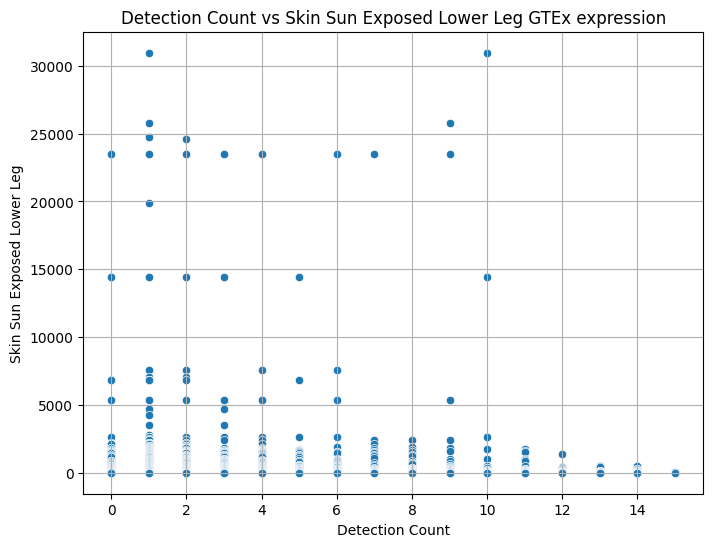

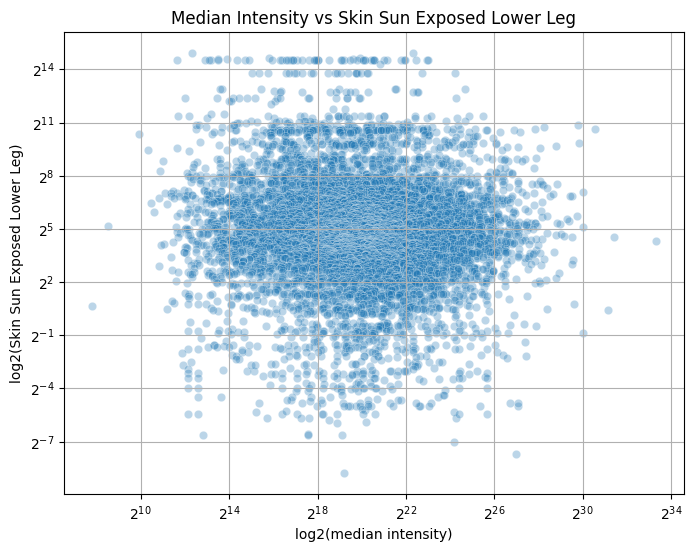

In [118]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='detection_count', y='Skin_Sun_Exposed_Lower_leg')
plt.title('Detection Count vs Skin Sun Exposed Lower Leg GTEx expression')
plt.ylabel('Skin Sun Exposed Lower Leg')
plt.xlabel('Detection Count')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='median_intensity', y='Skin_Sun_Exposed_Lower_leg', alpha=0.3)
plt.title('Median Intensity vs Skin Sun Exposed Lower Leg')
plt.ylabel('log2(Skin Sun Exposed Lower Leg)')
plt.xlabel('log2(median intensity)')
plt.xscale('log', base=2)
plt.yscale('log', base=2)
plt.grid(True)
plt.show()

In [119]:
gtex_blood_df = gtex_df[['Name', 'Description', 'Whole_Blood']]
gtex_blood_df['ensembl ID'] = gtex_blood_df['Name'].apply(lambda x: x.split('.')[0])
gtex_blood_df.drop(columns='Name',inplace=True)
gtex_blood_df.head()

/tmp/ipykernel_877733/2599375790.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gtex_blood_df['ensembl ID'] = gtex_blood_df['Name'].apply(lambda x: x.split('.')[0])
/tmp/ipykernel_877733/2599375790.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gtex_blood_df.drop(columns='Name',inplace=True)


,Description,Whole_Blood,ensembl ID
0,DDX11L1,0.00000,ENSG00000223972
1,WASH7P,2.89503,ENSG00000227232
2,MIR6859-1,0.00000,ENSG00000278267
3,MIR1302-2HG,0.00000,ENSG00000243485
4,FAM138A,0.00000,ENSG00000237613


In [120]:
df = df.merge(gtex_blood_df, on='ensembl ID')

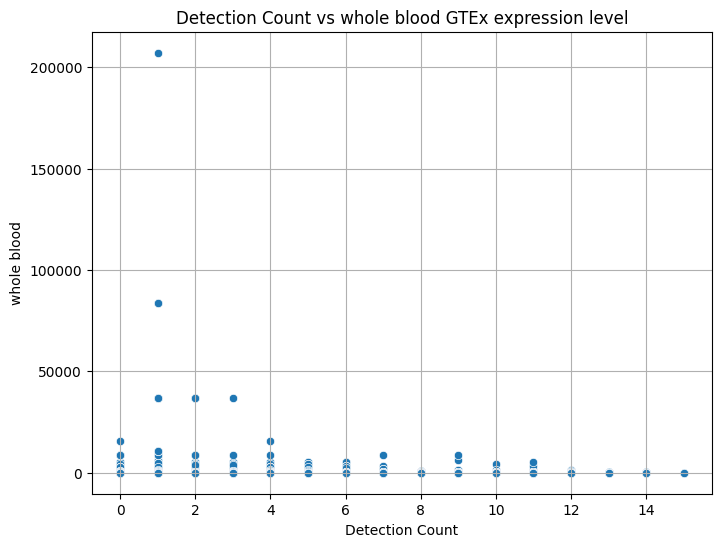

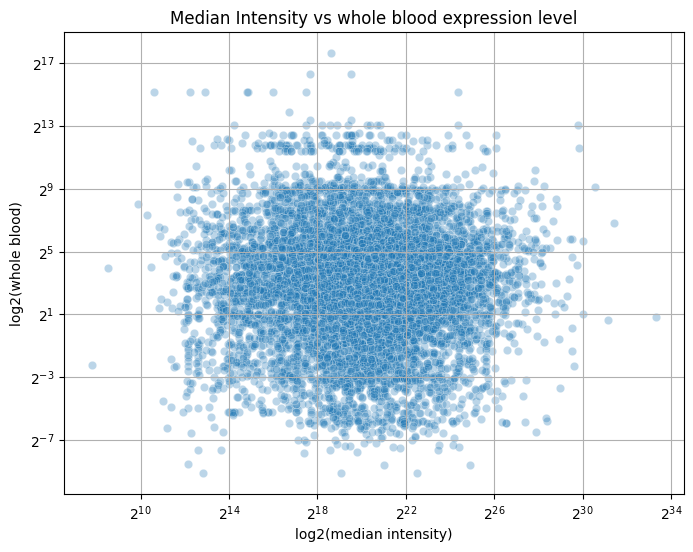

In [73]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='detection_count', y='Whole_Blood')
plt.title('Detection Count vs whole blood GTEx expression level')
plt.ylabel('whole blood')
plt.xlabel('Detection Count')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='median_intensity', y='Whole_Blood', alpha=0.3)
plt.title('Median Intensity vs whole blood expression level')
plt.ylabel('log2(whole blood)')
plt.xlabel('log2(median intensity)')
plt.xscale('log', base=2)
plt.yscale('log', base=2)
plt.grid(True)
plt.show()

In [137]:
sample_cols = ['VMM1/Nil 1', 'VMM1/Nil 2', 'VMM1/Nil 3', 'VMM1/IFN 1', 'VMM1/IFN 2', 'VMM1/IFN 3', '1106/Nil 1', '1106/Nil 2', '1106/Nil 3', '1106/IFN 1', '1106/IFN 2', '1106/IFN 3', 'A431_sC6/Rep 1', 'A431_sC6/Rep 2', 'A431_sC6/Rep 3']

# get detection counts and median intensity for melanocytes and keratinocytes
melanocyte_cols = ['VMM1/Nil 1', 'VMM1/Nil 2', 'VMM1/Nil 3', 'VMM1/IFN 1', 'VMM1/IFN 2', 'VMM1/IFN 3']
keratinocyte_cols = ['1106/Nil 1', '1106/Nil 2', '1106/Nil 3', '1106/IFN 1', '1106/IFN 2', '1106/IFN 3','A431_sC6/Rep 1', 'A431_sC6/Rep 2', 'A431_sC6/Rep 3']

df['melanocyte_median_intensity'] = df[melanocyte_cols].median(axis=1, skipna=True)
df['keratinocyte_median_intensity'] = df[keratinocyte_cols].median(axis=1, skipna=True)

def set_detection_count(row, cols):
    count = 0
    for col in cols:
        if pd.notna(row[col]) and row[col] != '-' and row[col] != 0:
            count += 1
    return count

df['melanocyte_detection_count'] = df.apply(set_detection_count, axis=1, args=[melanocyte_cols])
df['keratinocyte_detection_count'] = df.apply(set_detection_count, axis=1, args=[keratinocyte_cols])


In [138]:
# add rankings to df

melanocyte_peptides_ranked = df.sort_values(by=['melanocyte_detection_count','NetMHCpan.4 \nScore'], ascending=[False, True]).reset_index(drop=True).reset_index()
melanocyte_peptides_ranked.rename(columns={'index':'melanocyte_rank'}, inplace=True)
melanocyte_peptides_ranked['melanocyte_rank'] += 1

keratinocyte_peptides_ranked = df.sort_values(by=['keratinocyte_detection_count','NetMHCpan.4 \nScore'], ascending=[False, True]).reset_index(drop=True).reset_index()
keratinocyte_peptides_ranked.rename(columns={'index':'keratinocyte_rank'}, inplace=True)
keratinocyte_peptides_ranked['keratinocyte_rank'] += 1

gtex_skinleg_peptides_ranked = df.sort_values(by=['Skin_Sun_Exposed_Lower_leg', 'detection_count'], ascending=[False, False]).reset_index(drop=True).reset_index()
gtex_skinleg_peptides_ranked.rename(columns={'index':'gtex_rank'}, inplace=True)
gtex_skinleg_peptides_ranked.rename(columns={'Skin_Sun_Exposed_Lower_leg':'GTEx_Skin_Sun_Exposed_Lower_leg'}, inplace=True)

In [139]:
melanocyte_ranked = melanocyte_peptides_ranked[['Accession', 'melanocyte_rank', 'Peptide', 'ensembl ID']]
keratinocyte_ranked = keratinocyte_peptides_ranked[['Accession', 'keratinocyte_rank', 'Peptide', 'ensembl ID']]
gtex_ranked = gtex_skinleg_peptides_ranked[['Accession', 'gtex_rank', 'Peptide', 'ensembl ID']]

In [140]:
merged_df = df.merge(melanocyte_ranked, on=['Accession', 'Peptide', 'ensembl ID']).drop_duplicates('melanocyte_rank')
merged_df = merged_df.merge(keratinocyte_ranked, on=['Accession', 'Peptide', 'ensembl ID']).drop_duplicates('keratinocyte_rank')
merged_df = merged_df.merge(gtex_ranked, on=['Accession', 'Peptide', 'ensembl ID']).drop_duplicates('gtex_rank')

In [141]:
merged_df.head(20)

,Peptide,Peptide (with PTM),Length,Accession,Modification,VMM1/Nil 1,VMM1/Nil 2,VMM1/Nil 3,VMM1/IFN 1,VMM1/IFN 2,VMM1/IFN 3,1106/Nil 1,1106/Nil 2,1106/Nil 3,1106/IFN 1,1106/IFN 2,1106/IFN 3,A431_sC6/Rep 1,A431_sC6/Rep 2,A431_sC6/Rep 3,NetMHCpan.4 \nScore,"C0602 Binding Prediction\n(SB = strong binder, WB = weak binder)",C0602 Source Based\non Gibbs Clustering,detection_count,uniprot_id,ensembl ID,Gene stable ID version,Description,Skin_Sun_Exposed_Lower_leg,median_intensity,melanocyte_median_intensity,keratinocyte_median_intensity,melanocyte_detection_count,keratinocyte_detection_count,melanocyte_rank,keratinocyte_rank,gtex_rank
0,TRQDHAQQL,TRQDHAQQL,9.0,F5H6Y5|F5H6Y5_HUMAN;Q14980-2|NUMA1_HUMAN;Q1498...,Not found,97100000.0,330000000.0,2.490000e+08,1.770000e+07,1.390000e+09,6.090000e+08,61200.0,128000.0,686000.0,1760000.0,295000.0,8810000.0,1.890000e+08,8.130000e+08,5.250000e+07,0.0158,SB,high confidence,15,F5H6Y5,ENSG00000137497,ENSG00000137497.19,NUMA1,87.27150,52500000.0,2.895000e+08,1760000.0,6,9,33,1,2306
1,SSGPQRLV,SSGPQRLV,8.0,J3KRW7|J3KRW7_HUMAN;Q8N511|TM199_HUMAN;J3KS81|...,Not found,27100000.0,75500000.0,2.210000e+08,8.060000e+07,3.240000e+08,5.800000e+07,934000.0,528000.0,1530000.0,7910000.0,1560000.0,8570000.0,7.590000e+08,1.110000e+09,8.610000e+08,24.1400,None,high confidence,15,J3KRW7,ENSG00000244045,ENSG00000244045.13,TMEM199,15.86980,58000000.0,7.805000e+07,7910000.0,6,9,201,3,6735
2,SSVPGVRLL,SSVPGVRLL,9.0,B0YJC4|B0YJC4_HUMAN;P08670|VIME_HUMAN;A0A1B0GV...,Not found,143000000.0,473000000.0,2.730000e+09,1.570000e+09,6.970000e+09,4.690000e+09,810000.0,761000.0,1510000.0,4740000.0,NaN,15800000.0,2.380000e+07,5.370000e+08,1.110000e+06,0.4663,SB,high confidence,14,B0YJC4,ENSG00000026025,ENSG00000026025.16,VIM,486.18300,83400000.0,2.150000e+09,3125000.0,6,8,114,23,659
3,SAYGSVKAY,SAYGSVKAY,9.0,H0YKV8|H0YKV8_HUMAN;P07355|ANXA2_HUMAN;H0YN42|...,Not found,109000000.0,374000000.0,5.430000e+08,3.130000e+08,1.710000e+09,1.240000e+09,182000.0,95400.0,361000.0,1150000.0,195000.0,0.0,7.230000e+07,1.560000e+08,1.030000e+08,0.3110,SB,high confidence,14,H0YKV8,ENSG00000182718,ENSG00000182718.18,ANXA2,458.68100,103000000.0,4.585000e+08,361000.0,6,8,99,19,720
4,VRPDNTYEV,VRPDNTYEV,9.0,K7EJB9|K7EJB9_HUMAN;A0A7P0T861|A0A7P0T861_HUMA...,Not found,45200000.0,301000000.0,3.980000e+08,2.550000e+08,6.590000e+08,8.050000e+08,NaN,441000.0,2720000.0,5990000.0,1590000.0,16200000.0,5.060000e+08,2.390000e+07,1.910000e+08,0.0881,SB,high confidence,14,K7EJB9,ENSG00000179218,ENSG00000179218.15,CALR,271.20000,118100000.0,3.495000e+08,11095000.0,6,8,59,14,961
5,SHPNKVKVY,SHPNKVKVY,9.0,P21333|FLNA_HUMAN;P21333-2|FLNA_HUMAN;Q60FE5|Q...,Not found,1020000.0,70700000.0,2.100000e+08,3.470000e+07,8.770000e+08,3.010000e+08,805000.0,371000.0,1460000.0,8680000.0,NaN,19800000.0,3.100000e+09,3.360000e+09,2.030000e+08,0.6921,WB,high confidence,14,P21333,ENSG00000196924,ENSG00000196924.19,FLNA,252.90100,52700000.0,1.403500e+08,14240000.0,6,8,130,28,998
6,SRAKAVRAL,SRAKAVRAL,9.0,A0A7I2V473|A0A7I2V473_HUMAN;Q9H009|NACA2_HUMAN...,Not found,15800000.0,315000000.0,3.100000e+08,2.890000e+06,1.900000e+08,8.900000e+08,1580000.0,0.0,2120000.0,22300000.0,3620000.0,53500000.0,5.630000e+08,2.580000e+09,3.480000e+06,0.0204,SB,high confidence,14,A0A7I2V473,ENSG00000196531,ENSG00000196531.14,NACA,202.02000,22300000.0,2.500000e+08,3620000.0,6,8,36,12,1214
7,VASDVVRKV,VASDVVRKV,9.0,H7C410|H7C410_HUMAN;H7C024|H7C024_HUMAN;P35052...,Not found,2220000.0,7420000.0,1.270000e+07,2.150000e+07,6.940000e+07,0.000000e+00,602000.0,320000.0,688000.0,11000000.0,704000.0,8770000.0,3.830000e+09,2.220000e+09,1.050000e+09,0.9808,WB,high confidence,14,H7C410,ENSG00000063660,ENSG00000063660.9,GPC1,148.47300,8770000.0,1.006000e+07,8770000.0,5,9,468,2,1511
8,NRHGLIRKY,NRHGLIRKY,9.0,A0A087WTT6|A0A087WTT6_HUMAN;P62273|RS29_HUMAN;...,Not found,165000000.0,227000000.0,2.580000e+09,1.860000e+08,3.110000e+06,3.620000e+09,643000.0,47000.0,15600.0,37600000.0,696000.0,182000000.0,3.930000e+07,6.160000e+08,Na

In [142]:
gtex_ranked.shape

(10506, 4)

In [143]:
merged_df.shape

(10506, 37)

In [81]:
# to csv
merged_df.to_csv("braun2025_peptide_rank.csv", index=False)

In [82]:
simplified_merged_df = merged_df[['Peptide', 'melanocyte_rank', 'keratinocyte_rank','gtex_rank']]
simplified_merged_df.head()

,Peptide,melanocyte_rank,keratinocyte_rank,gtex_rank
0,TRQDHAQQL,33,1,2311
1,SSGPQRLV,201,3,6746
2,GGDSSSGPQRLV,208,1376,6747
3,DSSSGPQRLV,205,5172,6748
4,SSSGPQRLV,1790,2251,6749


In [83]:
# check netMHCpan scores with 4.1
sample = df.sample(200, random_state=40)
peps = (list(sample['Peptide'].str.strip("'")))
for i in peps:
    print(i)

SPGPPTRKL
RIKQKADSL
KPNANRIAL
KKSIAYTL
ARGPIQILNR
HNSNIIKKL
GGPFKKLD
YHFPELVKI
GDVQLDSVR
MTVERVRAL
DLFRGTLD
KTSGKIRLL
LPRAEARLL
AAYRASLV
PRSPDAAGATIL
LYNGATRKL
LYWSHPRKF
TRPDKARRL
DFIASKGVKL
NTDSPLRYV
TALKIMKV
VRPLPPAAI
VNHVTLSQPK
ARGPKKHL
VLLLDAGDQYQG
DSRPGGYGY
FRVVKLNEV
KRGDVIYI
TAGTLSLLLL
KEEITGTLR
YYVENGRLI
DAYQVLSTL
KALEENNNF
SRNPFAHVQL
DALDVANKIGII
DAVTYTEHAK
VRHERSPEV
YREASSQQGLAY
VTYLFPIQV
KTSPYPVIL
YVTTSTRTYS
FRFENVNGYTN
SQSPLPQYV
SNCPYSHVY
TTKVRLLV
YRNDKRIKL
FAKEIVSLI
KRKGYSYEL
SRGHYQLLL
STGPTRFF
VQIEEVRQV
TTGPSRQI
KVAKPKKA
DGRVSENTV
KLSIAVKNK
RRAQMTKYL
SPLRSSSAL
ARSAHAHVL
GGFGGGSFRGS
RVYVDITTY
RDGDILGKYVD
KRGGFNTF
AAASAGATRLL
ELVGVFGAY
IRQGIFYAM
ARSDKPIFTL
HRNPIAQST
ITAPPSRVL
TRSAHTQSL
DSKKLPSPA
YTPQAAREV
TRKPEPQVL
ARMSKTVDL
GRKPGAQEI
RLPEEIRRL
FRSQHYALL
RAADIRRKL
IRGALVLGY
SSNSYAIKK
IYPGHGRRY
YFFAYHVL
SRYSVVQSL
MNEVISLWK
GQSPVLRII
HLPSHIRIL
EAAVIPRLV
HRVDFPSSV
KASYRLHQL
LTPAEVRQV
KRASFAKSV
YRPEMKTEM
VRYQQETSV
HRKWSANEI
QGKLHSLV
ISRPQFDY
RTLYGFGG
DAREIVNNV
KRLEEWLGRTL
FRVPFI

In [84]:
sample_netmhc = sample[['Peptide', 'NetMHCpan.4 \nScore']]

In [85]:
netmhc4_1 = pd.read_csv("1889214_NetMHCpan.csv", header=1)
netmhc4_1.head()

,Pos,Peptide,ID,core,icore,EL-score,EL_Rank,Ave,NB
0,0,SPGPPTRKL,PEPLIST,SPGPPTRKL,SPGPPTRKL,0.0602,1.2276,0.0602,1
1,0,RIKQKADSL,PEPLIST,RIKQKADSL,RIKQKADSL,0.0083,4.4506,0.0083,0
2,0,KPNANRIAL,PEPLIST,KPNANRIAL,KPNANRIAL,0.0062,5.2954,0.0062,0
3,0,KKSIAYTL,PEPLIST,KKS-IAYTL,KKSIAYTL,0.0101,3.9627,0.0101,0
4,0,ARGPIQILNR,PEPLIST,ARGPIQILR,ARGPIQILNR,0.0017,9.9737,0.0017,0


In [86]:
sample_netmhc = sample_netmhc.merge(netmhc4_1[['Peptide','EL_Rank']], on='Peptide')
sample_netmhc.rename(columns={'EL_Rank':'netMHC4.1_Rank'}, inplace=True)

In [87]:
sample_netmhc.head(30)

,Peptide,NetMHCpan.4 \nScore,netMHC4.1_Rank
0,SPGPPTRKL,4.7218,1.2276
1,RIKQKADSL,2.3840,4.4506
2,KPNANRIAL,2.8087,5.2954
3,KKSIAYTL,10.3798,3.9627
4,ARGPIQILNR,15.8753,9.9737
5,HNSNIIKKL,2.3043,0.4092
6,GGPFKKLD,91.6667,90.0000
7,YHFPELVKI,0.3112,0.0638
8,GDVQLDSVR,56.2745,80.0000
9,MTVERVRAL,0.2640,0.1542


In [88]:
sample_netmhc.to_csv("netmhcpan_comparison.csv")

In [53]:
merged_df['Peptide'].to_csv('peptides.txt', index=False, header=False)

In [95]:
netmhc_4_1 = pd.read_excel("netMHCpan4_1_results.xlsx", header=1)

In [100]:
netmhc_4_1.tail()
netmhc_4_1['NB'] = netmhc_4_1['EL_Rank'].apply(lambda x: 'SB' if x <= 0.5 else ('WB' if x <= 2 else None))

In [147]:
netmhc_4_1.rename(columns={'EL_Rank':'netMHCpan4_1', 'NB':'netMHCpan4_1_binding_prediction'}, inplace=True)
netmhc_4_1.drop(columns=['ID', 'core', 'icore', 'Ave', 'EL-score'], inplace=True)
netmhc_4_1.head()

,Pos,Peptide,netMHCpan4_1,netMHCpan4_1_binding_prediction
0,0,TRQDHAQQL,0.0066,SB
1,0,SSGPQRLV,4.3740,None
2,0,GGDSSSGPQRLV,30.3000,None
3,0,DSSSGPQRLV,14.4174,None
4,0,SSSGPQRLV,0.3362,SB


In [149]:
merged_df = merged_df.merge(netmhc_4_1, on='Peptide').drop_duplicates()

In [152]:
merged_df.drop(columns=['Pos', 'Modification', 'C0602 Binding Prediction\n(SB = strong binder, WB = weak binder)', 'C0602 Source Based\non Gibbs Clustering'], inplace=True)
merged_df.head()

,Peptide,Peptide (with PTM),Length,Accession,VMM1/Nil 1,VMM1/Nil 2,VMM1/Nil 3,VMM1/IFN 1,VMM1/IFN 2,VMM1/IFN 3,1106/Nil 1,1106/Nil 2,1106/Nil 3,1106/IFN 1,1106/IFN 2,1106/IFN 3,A431_sC6/Rep 1,A431_sC6/Rep 2,A431_sC6/Rep 3,NetMHCpan.4 \nScore,detection_count,uniprot_id,ensembl ID,Gene stable ID version,Description,Skin_Sun_Exposed_Lower_leg,median_intensity,melanocyte_median_intensity,keratinocyte_median_intensity,melanocyte_detection_count,keratinocyte_detection_count,melanocyte_rank,keratinocyte_rank,gtex_rank,netMHCpan4_1,netMHCpan4_1_binding_prediction
0,TRQDHAQQL,TRQDHAQQL,9.0,F5H6Y5|F5H6Y5_HUMAN;Q14980-2|NUMA1_HUMAN;Q1498...,97100000.0,330000000.0,2.490000e+08,1.770000e+07,1.390000e+09,6.090000e+08,61200.0,128000.0,686000.0,1760000.0,295000.0,8810000.0,189000000.0,8.130000e+08,52500000.0,0.0158,15,F5H6Y5,ENSG00000137497,ENSG00000137497.19,NUMA1,87.2715,52500000.0,2.895000e+08,1760000.0,6,9,33,1,2306,0.0066,SB
1,SSGPQRLV,SSGPQRLV,8.0,J3KRW7|J3KRW7_HUMAN;Q8N511|TM199_HUMAN;J3KS81|...,27100000.0,75500000.0,2.210000e+08,8.060000e+07,3.240000e+08,5.800000e+07,934000.0,528000.0,1530000.0,7910000.0,1560000.0,8570000.0,759000000.0,1.110000e+09,861000000.0,24.1400,15,J3KRW7,ENSG00000244045,ENSG00000244045.13,TMEM199,15.8698,58000000.0,7.805000e+07,7910000.0,6,9,201,3,6735,4.3740,None
2,SSVPGVRLL,SSVPGVRLL,9.0,B0YJC4|B0YJC4_HUMAN;P08670|VIME_HUMAN;A0A1B0GV...,143000000.0,473000000.0,2.730000e+09,1.570000e+09,6.970000e+09,4.690000e+09,810000.0,761000.0,1510000.0,4740000.0,NaN,15800000.0,23800000.0,5.370000e+08,1110000.0,0.4663,14,B0YJC4,ENSG00000026025,ENSG00000026025.16,VIM,486.1830,83400000.0,2.150000e+09,3125000.0,6,8,114,23,659,0.0622,SB
3,SAYGSVKAY,SAYGSVKAY,9.0,H0YKV8|H0YKV8_HUMAN;P07355|ANXA2_HUMAN;H0YN42|...,109000000.0,374000000.0,5.430000e+08,3.130000e+08,1.710000e+09,1.240000e+09,182000.0,95400.0,361000.0,1150000.0,195000.0,0.0,72300000.0,1.560000e+08,103000000.0,0.3110,14,H0YKV8,ENSG00000182718,ENSG00000182718.18,ANXA2,458.6810,103000000.0,4.585000e+08,361000.0,6,8,99,19,720,0.1412,SB
4,VRPDNTYEV,VRPDNTYEV,9.0,K7EJB9|K7EJB9_HUMAN;A0A7P0T861|A0A7P0T861_HUMA...,45200000.0,301000000.0,3.980000e+08,2.550000e+08,6.590000e+08,8.050000e+08,NaN,441000.0,2720000.0,5990000.0,1590000.0,16200000.0,506000000.0,2.390000e+07,191000000.0,0.0881,14,K7EJB9,ENSG00000179218,ENSG00000179218.15,CALR,271.2000,118100000.0,3.495000e+08,11095000.0,6,8,59,14,961,0.0272,SB


In [160]:
merged_df.drop_duplicates().to_csv("braun2025_peptide_rank.csv", index=False)

In [159]:
merged_df.drop_duplicates()['netMHCpan4_1_binding_prediction'].value_counts()

SB    4917
WB    1386
Name: netMHCpan4_1_binding_prediction, dtype: int64